# Assignment 8 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## Question 1 

derivative of unevenly spaced data 
$$ f^{'}(x) = f( x_0) \frac{2x - x_1 - x_2 }{(x_0 - x_1)(x_0 - x_2 )} + f(x_1)\frac{2x - x_0 - x_2 }{(x_1 - x_0 )(x_1 - x_2)} + f(x_2 )\frac{2x - x_0 - x_1 }{(x_2 - x_0 )( x_2 - x_1 )}$$


In [2]:
# given data set 
z = np.array([3.75 , 1.25 , 0 ])
T = np.array( [10 , 12 , 13.5 ])
k = 3.5e-7 
r = 1800 
c = 840 

In [3]:
# calculating the derivative at Z = 0 
x = 0 
dtdz = 0 
for i1 in range( 3 ): 
    i2 = (i1+1)%3 
    i3 = (i1+2)%3
    dtdz += T[i1]*(2*x - z[i1] - z[i2])/((z[i1]-z[i2])*(z[i1]-z[i3]))

In [4]:
# calculating q( x = 0 )
q = - k * r * c * dtdz 
print( f'q(x=0) = {q}')

q(x=0) = 5.997599999999999


## Question 2 

theory : 
given $\frac{d y}{d x } = f(x , y( x ))$ and $y(x_0) = y_0 $ we have $ y( x_0 + h ) = y_0 + h*( f( x_0 , y_0 )) $ 

question : 
$$\frac{\mathrm{d}v}{\mathrm{d}t} = a - b v$$

In [5]:
# defining parameters 
a = 10 
b = 1.0 

# defining initial conditions 
# at t = 0 
v0 = 30 # m/s 

In [6]:
def euler_ode( dvdt , v0 ,  t0 , tn , n = 10000): 
    t = np.linspace( t0 , tn , n )
    h = ( tn - t0 )/n 
    v = np.zeros( t.size )
    v[0] = v0
    for i in range( 1 , t.size ): 
        v[i] = v[i-1] + h*dvdt( v[i-1] )
    return v , t 

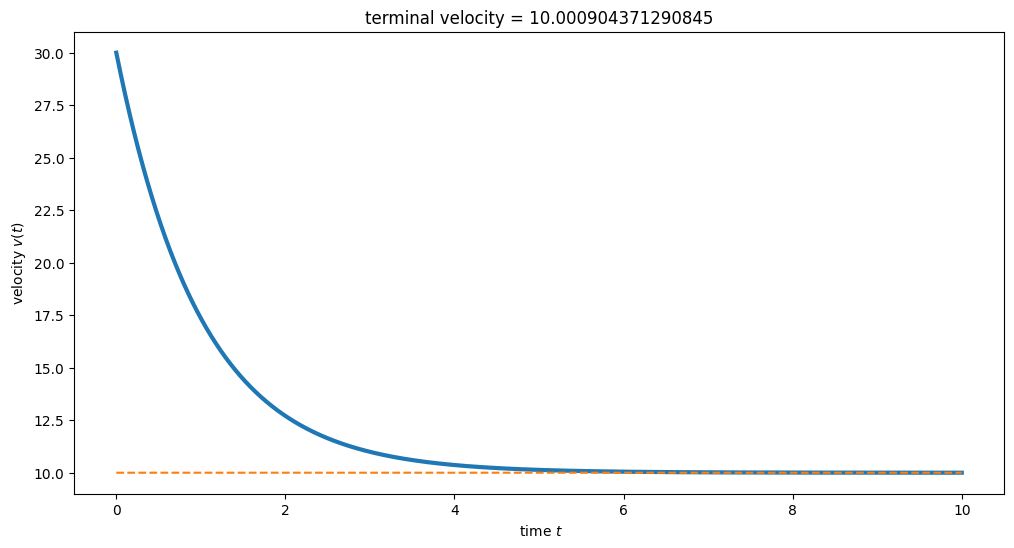

In [7]:
dvdt = lambda v : a - b*v 
v , t = euler_ode( dvdt , v0 , 0 , 10 )

fig , ax = plt.subplots( figsize =( 12  , 6 ))
plt.plot( t , v  , linewidth = 3 )
plt.plot( t , np.zeros( t.size ) + a , '--')
plt.xlabel(r' time $t$')
plt.ylabel(r'velocity $v(t)$')
plt.title('terminal velocity = '  + str( v[-1]))
plt.show()

## Question 3 

$$\frac{dN_A}{dt} = N_b/\tau - N_a/\tau $$
$$ = N_A/\tau - N_B/\tau $$

In [8]:
def euler_ode_2( dnadt , dnbdt , na0 , nb0 , t0 , tn , n = 10000 ): 
    t = np.linspace( t0 , tn , n )
    h = ( tn - t0 )/n 
    na = np.zeros( t.size )
    nb = np.zeros( t.size )
    na[0] = na0 
    nb[0] = nb0 
    for i in range( 1 , t.size ): 
        na[i] = na[i-1] + h*dnadt( na[i-1] , nb[i-1])
        nb[i] = nb[i-1] + h*dnbdt( na[i-1] , nb[i-1])
    return na , nb , t 

In [9]:
tau = 1 
def dnadt( na , nb ): 
    return ( nb - na )/tau 
def dnbdt( na , nb ): 
    return ( na - nb )/tau 

In [33]:
# trying with na = 100 , nb = 0 at t = 0 
def plotq3(  na0 , nb0 , tn ): 
    fig , ax = plt.subplots( figsize =( 10  , 5 ))
    na , nb , t = euler_ode_2( dnadt , dnbdt , na0 , nb0 , 0 , tn )
    ax.set_title(rf'$N_A(0)$= {na0} and $N_B(0)$ = {nb0}')
    ax.plot( t , na , label = r'$N_A(t)$' ,color =  'r')
    ax.plot( t , nb , label = r'$N_B(t)$' ,color = 'b')
    ax.plot( t , nb + na , label = r'$N_B(t) + N_A(t)$')
    plt.ylim([0,102])
    plt.legend()
    plt.grid()
    plt.show()

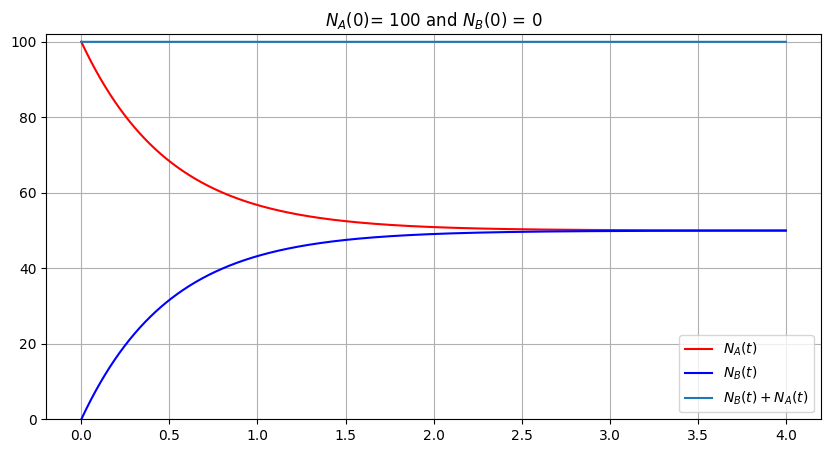

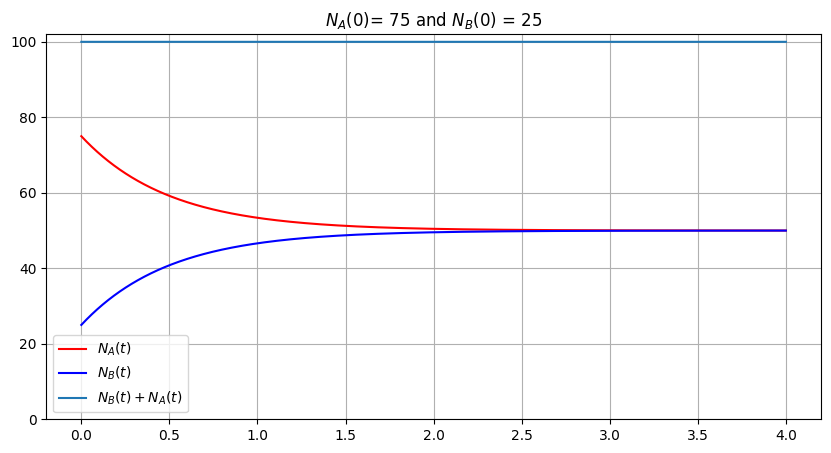

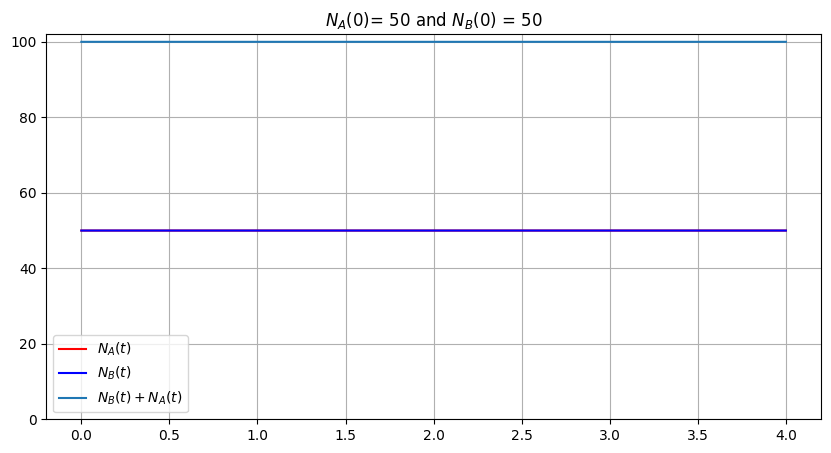

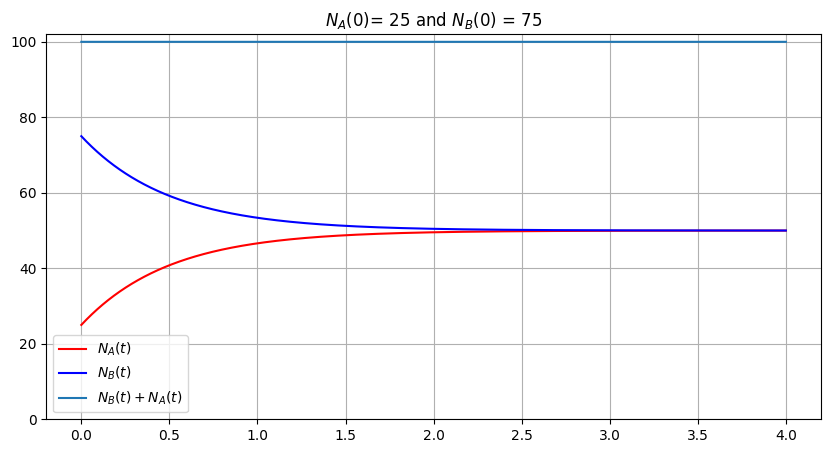

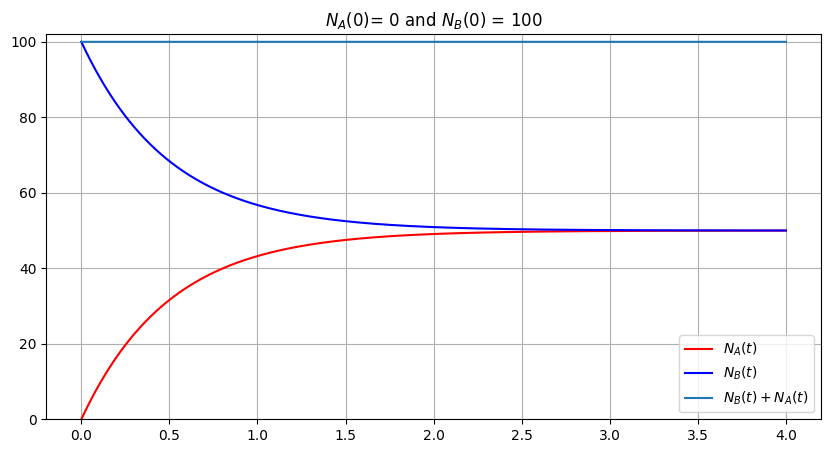

In [34]:
na0 = [ 100 , 75 , 50 , 25 , 0 ]
nb0 = [ 0 , 25 , 50 , 75 , 100 ]

for i in range( len( na0 )): 
    plotq3( na0[i] , nb0[i] , 4  )